In [1]:
# !pip install ace-tools

In [2]:
# !conda install -y anaconda::networkx

# Comprehensive Graph Analysis: Use Cases, Algorithms, and Applications

Load points are defined as hot spots in the metabolic network (enzymes/metabolites) based on the ratio of number of k-shortest paths passing through a metabolite/enzyme (in/out) and number of nearest neighbour links (in/out) attached to it, compared to the average load value in the network.

# Documentation: Analyzing Directed Graphs for HCP, Traffic, and Metabolic Networks
This implementation analyzes directed graphs for multiple use cases:
1. **Healthcare Provider (HCP) Networks**: Models referral relationships with weights representing patient volume.
2. **Traffic Networks**: Models city nodes with roads (edges) weighted by travel time or traffic volume.
3. **Metabolic Networks**: Models metabolites and their interactions via enzymes, with weights representing reaction flux or importance.
---
## **Key Features**
### **Impact Metrics**
The **impact score** is computed for each node using the following components:
1. **Dominance** ($\alpha$):
  - Captures node importance using **betweenness centrality**, which measures how often a node lies on the shortest paths between other nodes.
2. **Load Impact** ($\beta$):
  - Represents the node's contribution to **inbound** and **outbound paths**.
3. **Choke Point Disruption** ($\gamma$):
  - Identifies critical nodes whose removal would disrupt network connectivity.
The **impact score formula** is:
$$
\text{Impact Score} = \alpha \times \text{Betweenness Centrality} + \beta \times (\text{Load In} + \text{Load Out}) + \gamma \times \text{Choke Point Contribution}
$$
#### **Where:**
- $\alpha, \beta, \gamma$: User-defined weights (from `CONFIG`).
- **Total Load** ($\text{Load In} + \text{Load Out}$): Measures traffic, patient flow, or reaction importance.
- **Choke Point Contribution**: Evaluates the cost of removing the node (e.g., disruption to shortest paths or connectivity).
---
## **Visualization**
Nodes are visualized with the following color scheme:
1. **Red**: High load, high betweenness, and choke point.
2. **Orange**: High load and choke point.
3. **Blue**: High betweenness and choke point.
4. **Grey**: Other nodes.
---
## **Use Cases**
### 1. **Healthcare Provider (HCP) Networks**
- **Problem**: Optimize referral systems and identify critical healthcare providers.
- **Nodes**: Hospitals, clinics, and specialists.
- **Edges**: Referral relationships, weighted by patient volume.
- **Example**:
   - High-load choke points: Overburdened hospitals critical for referrals.
   - High-betweenness nodes: Central hubs in the network.
   - Output:
       - CSV file: Provider metrics (load, centrality, choke point status).
       - Graph: Visualizes key providers.
### 2. **Traffic Networks**
- **Problem**: Optimize traffic flow and identify critical roads for congestion management.
- **Nodes**: Cities or intersections.
- **Edges**: Roads, weighted by travel time or traffic volume.
- **Example**:
   - High-load choke points: Roads with the highest traffic that are critical for connectivity.
   - High-betweenness nodes: Intersections central to traffic distribution.
   - Output:
       - CSV file: Road and node metrics.
       - Graph: Highlights key intersections and roads.
### 3. **Metabolic Networks**
- **Problem**: Identify key metabolites for drug targeting and pathway optimization.
- **Nodes**: Metabolites.
- **Edges**: Reactions catalyzed by enzymes or genes, weighted by flux or importance.
- **Example**:
   - Choke points: Metabolites critical for pathway connectivity.
   - Light-load choke points: Low-flux metabolites that are potential drug targets.
   - Output:
       - CSV file: Metabolite metrics (load, centrality, choke point status).
       - Graph: Highlights choke points and light-load nodes.
---
## **Key Functions**
### 1. **`compute_path_counts(graph, method, k, weight)`**
- Computes the number of paths passing through each node (inbound and outbound).
- Methods: All-pairs shortest paths (`apsp`), \( k \)-shortest paths (`ksp`), or single-source shortest paths (`dijkstra`).
### 2. **`compute_load(graph, p_in, k_in, p_out, k_out)`**
- Computes load metrics for all nodes:
 - **Load In**: Contribution from inbound paths.
 - **Load Out**: Contribution from outbound paths.
### 3. **`compute_centralities(graph)`**
- Computes **degree**, **betweenness**, and **closeness centralities** for all nodes.
### 4. **`find_node_based_choke_points(graph, load_data)`**
- Identifies choke points (nodes whose removal disrupts connectivity).
### 5. **`unified_impact_score_with_dominance(graph, config)`**
- Combines centrality, load, and choke metrics into a unified impact score:
\[
\text{Impact Score} = \alpha \times \text{Betweenness Centrality} + \beta \times (\text{Load In} + \text{Load Out}) + \gamma \times \text{Choke Point Contribution}
\]
### 6. **Visualization Functions**
- **`visualize_hcp_graph`**: Highlights critical providers in HCP networks.
- **`visualize_metabolic_network`**: Highlights choke points and light-load nodes in metabolic networks.
---
## **Workflow**
1. **HCP Network Analysis**:
  - Input nodes: Hospitals, clinics, specialists.
  - Weighted edges: Referral relationships (patient volume).
  - Outputs:
    - CSV: Key metrics (impact score, load, centralities, choke point status).
    - Graph: Visualizes critical providers.
2. **Traffic Network Analysis**:
  - Input nodes: Cities or intersections.
  - Weighted edges: Roads (travel time, traffic volume).
  - Outputs:
    - CSV: Node metrics for traffic optimization.
    - Graph: Highlights critical intersections and roads.
3. **Metabolic Network Analysis**:
  - Input nodes: Metabolites.
  - Weighted edges: Reactions (flux, enzyme catalysis).
  - Outputs:
    - CSV: Metrics for metabolites (load, centralities, choke point status).
    - Graph: Visualizes critical metabolites and potential drug targets.
---
## **Output Details**
1. **Tables and CSV Files**:
   - **HCP Network**: `hcp_network_metrics_with_load.csv`
   - **Metabolic Network**: `metabolic_network_metrics_with_load.csv`
2. **Graph Visualizations**:
   - **HCP Network**: `hcp_network.png`
   - **Metabolic Network**: `metabolic_network.png`
3. **Columns in Tables**:
   - **Node**: Identifier for each node (e.g., hospitals, metabolites).
   - **Impact Score**: Combines centrality, load, and choke metrics.
   - **Degree Centrality**: Connectivity importance.
   - **Betweenness Centrality**: Pathway centrality.
   - **Closeness Centrality**: Proximity in the network.
   - **Load (In/Out)**: Contribution to inbound and outbound paths.
   - **Is Choke Point**: Whether the node is a choke point.
   - **Is Light Load** (Metabolic Only): Whether the node is a light-load choke point.
---
## **Customization**
1. **Path Selection**:
  - Use `CONFIG["path_type"]` to switch between:
    - `dijkstra`: Single-source shortest paths.
    - `apsp`: All-pairs shortest paths.
    - `ksp`: \( k \)-shortest paths.
2. **Weight Parameters**:
  - Adjust `CONFIG` to prioritize specific metrics:
    - \( \alpha \): Dominance (betweenness centrality).
    - \( \beta \): Load contribution.
    - \( \gamma \): Choke point disruption.
3. **Thresholds**:
  - Modify thresholds for **load** (e.g., top 20%) and **betweenness** (e.g., > 0.3) to fine-tune node classifications.
---

In [3]:
import heapq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd 

In [4]:
EPSILON = 1e-12  # Small constant to avoid infinities
# Config map for user preferences
CONFIG = {
   "path_type": "apsp",  # Options: "dijkstra", "apsp", "ksp"
   "k": 3,               # Number of paths for k-shortest paths
   "alpha": 0.4,         # Weight for Dominance (Betweenness)
   "beta": 0.4,          # Weight for Load Impact
   "gamma": 0.2          # Weight for Choke Points
}
# Utility: k-Shortest Paths
def k_shortest_paths_dijkstra(graph, source, target, k=3, weight="weight"):
   paths = []
   queue = [(0, source, [])]  # (cost, current node, path)
   while queue and len(paths) < k:
       cost, node, path = heapq.heappop(queue)
       path = path + [node]
       if node == target:
           paths.append((cost, path))
           continue
       for neighbor, edge_data in graph[node].items():
           if neighbor not in path:
               heapq.heappush(queue, (cost + edge_data.get(weight, 1), neighbor, path))
   return paths
# Compute Path Counts Based on Path Selection
def compute_path_counts(graph, method="apsp", k=3, weight="weight"):
   p_in, p_out = defaultdict(int), defaultdict(int)
   if method == "apsp":
       apsp = dict(nx.all_pairs_dijkstra_path_length(graph, weight=weight))
       for source in graph.nodes:
           for target in graph.nodes:
               if source != target:
                   # Safely access APSP with .get()
                   path_length = apsp.get(source, {}).get(target, float('inf'))
                   if path_length < float('inf'):  # Ignore unreachable nodes
                       p_in[target] += 1
                       p_out[source] += 1
   elif method == "ksp":
       for source in graph.nodes:
           for target in graph.nodes:
               if source != target:
                   paths = k_shortest_paths_dijkstra(graph, source, target, k=k, weight=weight)
                   for _, path in paths:
                       for node in path:
                           if node != source:
                               p_in[node] += 1
                           if node != target:
                               p_out[node] += 1
   elif method == "dijkstra":
       for source in graph.nodes:
           distances = nx.single_source_dijkstra_path_length(graph, source, weight=weight)
           for target, path_length in distances.items():
               if source != target:
                   p_in[target] += 1
                   p_out[source] += 1
   return dict(p_in), dict(p_out)
# Compute Load Metrics
def compute_load(graph, p_in, k_in, p_out, k_out):
   total_p_in, total_k_in = sum(p_in.values()), sum(k_in.values())
   avg_ratio_in = total_p_in / (total_k_in + EPSILON)
   total_p_out, total_k_out = sum(p_out.values()), sum(k_out.values())
   avg_ratio_out = total_p_out / (total_k_out + EPSILON)
   load_in, load_out = {}, {}
   for node in graph.nodes:
       p_in_value = max(p_in.get(node, 0), EPSILON)
       k_in_value = max(k_in[node], EPSILON)
       p_out_value = max(p_out.get(node, 0), EPSILON)
       k_out_value = max(k_out[node], EPSILON)
       load_in[node] = np.log((p_in_value / k_in_value) / (avg_ratio_in + EPSILON))
       load_out[node] = np.log((p_out_value / k_out_value) / (avg_ratio_out + EPSILON))
   return {"load_in": load_in, "load_out": load_out}
# Compute Choke Points
def find_node_based_choke_points(graph, load_data):
   choke_points = []
   for node in graph.nodes:
       if graph.degree[node] == 2:
           neighbors = list(graph.neighbors(node))
           if len(neighbors) == 2:
               u, v = neighbors
               G_copy = graph.copy()
               G_copy.remove_node(node)
               if not nx.has_path(G_copy, u, v):
                   cost_impact = float('inf')
               else:
                   original_length = nx.shortest_path_length(graph, u, v)
                   new_length = nx.shortest_path_length(G_copy, u, v)
                   cost_impact = (new_length + EPSILON) / (original_length + EPSILON)
               load_contribution = load_data["load_in"].get(node, 0) + load_data["load_out"].get(node, 0)
               choke_points.append((node, cost_impact, load_contribution))
   return sorted(choke_points, key=lambda x: (-x[1], -x[2]))
# Compute Centrality Measures
def compute_centralities(graph):
   return {
       "degree": nx.degree_centrality(graph),
       "betweenness": nx.betweenness_centrality(graph),
       "closeness": nx.closeness_centrality(graph)
   }
# Visualization function with updated color scheme
def visualize_graph(graph, choke_points, load_data, centralities, impact_scores, output_file):
   """
   Visualizes the graph with color-coded nodes:
   - Red: High load, high betweenness, and choke points.
   - Purple: High load and choke points.
   - Orange: High betweenness and choke points.
   - Blue: Other nodes.
   """
   pos = nx.spring_layout(graph)
   total_load = {node: load_data["load_in"][node] + load_data["load_out"][node] for node in graph.nodes}
   threshold_load = np.percentile(list(total_load.values()), 80)  # Top 20% load
   load_points = [node for node, load in total_load.items() if load >= threshold_load]
   high_betweenness = {node for node, betw in centralities["betweenness"].items() if betw > 0.3}
   high_load_choke_points = {cp[0] for cp in choke_points if cp[0] in load_points}
   high_betweenness_choke_points = {cp[0] for cp in choke_points if cp[0] in high_betweenness}
   node_colors = []
   for node in graph.nodes:
       if node in high_load_choke_points and node in high_betweenness:
           node_colors.append("red")  # High load, high betweenness, and choke point
       elif node in high_load_choke_points:
           node_colors.append("orange")  # High load and choke point
       elif node in high_betweenness_choke_points:
           node_colors.append("blue")  # High betweenness and choke point
       else:
           node_colors.append("grey")  # Other nodes
   nx.draw(graph, pos, with_labels=True, node_color=node_colors, font_weight="bold", node_size=700)
   plt.title("Graph with Load, Betweenness, and Choke Points", fontsize=16)
   plt.savefig(output_file, dpi=300)
   plt.show()

# Visualization function for Metabolic Network
def visualize_metabolic_network(graph, choke_points, light_load_points, output_file):
   pos = nx.planar_layout(graph)
   node_colors = []
   for node in graph.nodes:
       if node in [cp[0] for cp in choke_points]:
           node_colors.append("red")  # Choke points
       elif node in [lp[0] for lp in light_load_points]:
           node_colors.append("green")  # Light load points
       else:
           node_colors.append("blue")  # Other nodes
   nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight="bold")
   plt.title("Metabolic Network: Choke Points and Light-Load Targets", fontsize=16)
   plt.savefig(output_file, dpi=300)
   plt.show()

# Save and display results
def save_and_display_results(data, output_csv, table_name):
   df = pd.DataFrame(data)
   df.to_csv(output_csv, index=False)
   print(f"\n{table_name}")
   # print(df)
   # Display in Jupyter Notebook
   from IPython.display import display, HTML
   display(HTML(df.to_html(index=False)))
   return df

# Unified Impact Score with Dominance
def unified_impact_score_with_dominance(graph, config):
   method = config["path_type"]
   k = config["k"]
   alpha, beta, gamma = config["alpha"], config["beta"], config["gamma"]
   # Path Metrics
   p_in, p_out = compute_path_counts(graph, method=method, k=k)
   k_in = {n: graph.in_degree(n) for n in graph.nodes}
   k_out = {n: graph.out_degree(n) for n in graph.nodes}
   load_data = compute_load(graph, p_in, k_in, p_out, k_out)
   total_load = {node: load_data["load_in"][node] + load_data["load_out"][node] for node in graph.nodes}
   # Choke Points
   choke_points = find_node_based_choke_points(graph.to_undirected(), load_data)
   choke_cost = {node: next((cp[2] for cp in choke_points if cp[0] == node), 0) for node in graph.nodes}
   # Centralities
   centralities = compute_centralities(graph)
   # Combined Impact Score
   impact_scores = {}
   for node in graph.nodes:
       impact_scores[node] = (
           alpha * centralities["betweenness"].get(node, 0) +  # Dominance contribution
           beta * total_load.get(node, 0) +                   # Load contribution
           gamma * choke_cost.get(node, 0)                    # Choke contribution
       )
   return impact_scores, centralities, choke_points, load_data


# Example Graph: Traffic Network

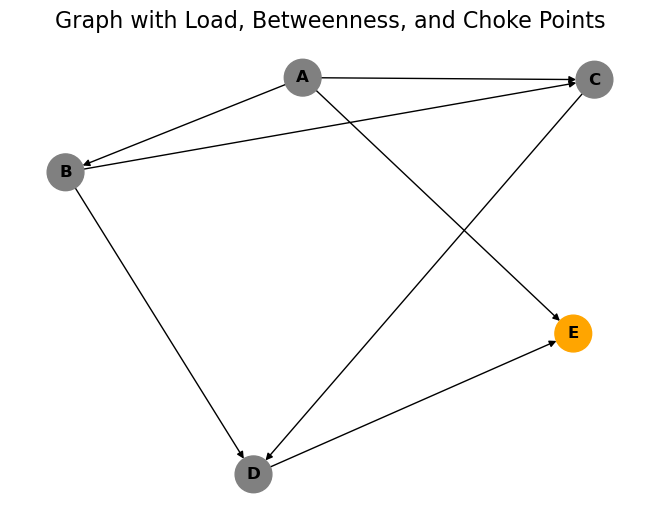


Traffic Network Metrics


Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
A,-0.170267,0.75,0.000000,0.000000,-0.356675,-0.068993,False
B,-0.106487,0.75,0.041667,0.250000,-0.356675,0.048790,False
C,0.008586,0.75,0.041667,0.500000,-0.356675,0.336472,False
D,-0.056487,0.75,0.166667,0.562500,0.048790,-0.356675,False
E,-0.012122,0.50,0.000000,0.666667,0.336472,-0.356675,True


,Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
0,A,-0.170267,0.75,0.000000,0.000000,-0.356675,-0.068993,False
1,B,-0.106487,0.75,0.041667,0.250000,-0.356675,0.048790,False
2,C,0.008586,0.75,0.041667,0.500000,-0.356675,0.336472,False
3,D,-0.056487,0.75,0.166667,0.562500,0.048790,-0.356675,False
4,E,-0.012122,0.50,0.000000,0.666667,0.336472,-0.356675,True


In [5]:
# Example Usage
G = nx.DiGraph()
G.add_weighted_edges_from([
   ("A", "B", 5), ("B", "C", 10), ("C", "D", 3),
   ("D", "E", 8), ("A", "C", 15), ("B", "D", 20),
   ("A", "E", 25)
])
# Compute metrics
impact_scores, centralities, choke_points, load_data = unified_impact_score_with_dominance(G, CONFIG)
# Visualize graph
visualize_graph(G, choke_points, load_data, centralities, impact_scores, "output_graph_with_dominance.png")

# Add load and choke metrics to HCP data
traffic_data = [
   {
       "Node": node,
       "Impact Score": impact_scores[node],
       "Degree Centrality": centralities["degree"].get(node, 0),
       "Betweenness Centrality": centralities["betweenness"].get(node, 0),
       "Closeness Centrality": centralities["closeness"].get(node, 0),
       "Load (In)": load_data["load_in"].get(node, 0),
       "Load (Out)": load_data["load_out"].get(node, 0),
       "Is Choke Point": node in [cp[0] for cp in choke_points],
   }
   for node in impact_scores
]
# Save and display results
save_and_display_results(traffic_data, "traffic_network_metrics.csv", "Traffic Network Metrics")


# Example HCP Network

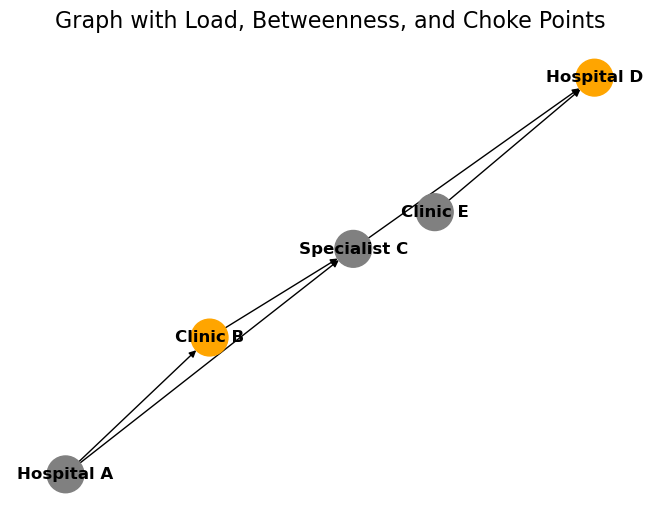


HCP Network Metrics


Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
Hospital A,-0.160488,0.50,0.000000,0.000000,-0.336472,0.068993,True
Clinic B,0.012122,0.50,0.000000,0.250000,-0.336472,0.356675,True
Specialist C,-0.202511,0.75,0.166667,0.500000,-0.336472,-0.336472,False
Hospital D,0.012122,0.50,0.000000,0.666667,0.356675,-0.336472,True
Clinic E,-0.269178,0.25,0.000000,0.000000,-0.336472,-0.336472,False


,Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
0,Hospital A,-0.160488,0.50,0.000000,0.000000,-0.336472,0.068993,True
1,Clinic B,0.012122,0.50,0.000000,0.250000,-0.336472,0.356675,True
2,Specialist C,-0.202511,0.75,0.166667,0.500000,-0.336472,-0.336472,False
3,Hospital D,0.012122,0.50,0.000000,0.666667,0.356675,-0.336472,True
4,Clinic E,-0.269178,0.25,0.000000,0.000000,-0.336472,-0.336472,False


In [6]:
# --- HCP Network Example ---
hcp_graph = nx.DiGraph()
hcp_graph.add_nodes_from(["Hospital A", "Clinic B", "Specialist C", "Hospital D", "Clinic E"])
hcp_graph.add_weighted_edges_from([
   ("Hospital A", "Clinic B", 120),
   ("Clinic B", "Specialist C", 80),
   ("Specialist C", "Hospital D", 90),
   ("Hospital A", "Specialist C", 200),
   ("Clinic E", "Hospital D", 60)
])
impact_scores, centralities, choke_points, load_data = unified_impact_score_with_dominance(hcp_graph, CONFIG)
visualize_graph(hcp_graph, choke_points, load_data, centralities, impact_scores, "hcp_network.png")
# Add load and choke metrics to HCP data
hcp_data = [
   {
       "Node": node,
       "Impact Score": impact_scores[node],
       "Degree Centrality": centralities["degree"].get(node, 0),
       "Betweenness Centrality": centralities["betweenness"].get(node, 0),
       "Closeness Centrality": centralities["closeness"].get(node, 0),
       "Load (In)": load_data["load_in"].get(node, 0),
       "Load (Out)": load_data["load_out"].get(node, 0),
       "Is Choke Point": node in [cp[0] for cp in choke_points],
   }
   for node in impact_scores
]
save_and_display_results(hcp_data, "hcp_network_metrics.csv", "HCP Network Metrics")


# Example: Drug Target Identification in a Metabolic Network

In a metabolic network, we can represent metabolites as nodes, and enzymes/genes as connecting entities (edges). Choke points with light load (low traffic but critical for connectivity) can be prioritized as potential drug targets since inhibiting them will disrupt the pathway while minimizing unintended effects on the network.
Example Network
Structure:
- Nodes: Metabolites .
- Edges: Enzymes  or Genes  connecting metabolites.
- Weights: Reaction flux, connection strength, or number of pathways utilizing the edge.
---

## Graph Construction

In [7]:

# Example Metabolic Network
metabolic_graph = nx.DiGraph()
# Add nodes (metabolites)
metabolic_graph.add_nodes_from(["M1", "M2", "M3", "M4", "M5"])
# Add edges (reactions catalyzed by enzymes or genes)
# Edge weights represent reaction flux or importance
metabolic_graph.add_weighted_edges_from([
   ("M1", "M2", 5),  # Enzyme E1
   ("M2", "M3", 10), # Enzyme E2
   ("M3", "M4", 3),  # Enzyme E3
   ("M4", "M5", 8),  # Enzyme E4
   ("M1", "M3", 15), # Enzyme E5
   ("M2", "M4", 20), # Enzyme E6
   ("M1", "M5", 25)  # Enzyme E7
])

Applying the Algorithms

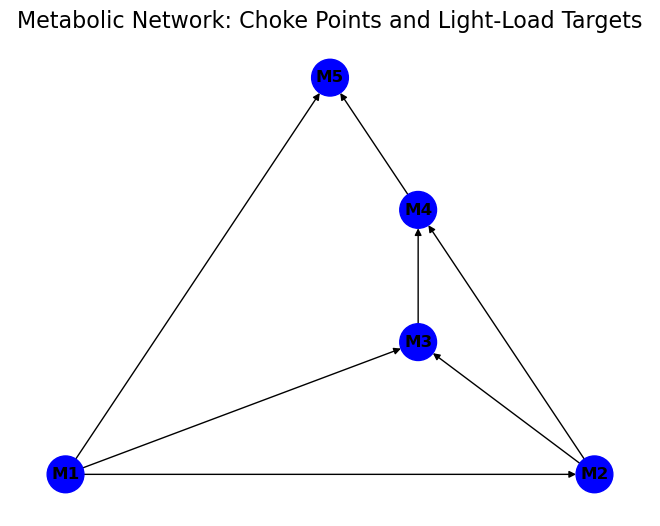


Metabolic Network Light-Load Choke Points


Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
M1,0,0.75,0.000000,0.000000,-0.356675,-0.068993,False
M2,0,0.75,0.041667,0.250000,-0.356675,0.048790,False
M3,0,0.75,0.041667,0.500000,-0.356675,0.336472,False
M4,0,0.75,0.166667,0.562500,0.048790,-0.356675,False
M5,0,0.50,0.000000,0.666667,0.336472,-0.356675,False


,Node,Impact Score,Degree Centrality,Betweenness Centrality,Closeness Centrality,Load (In),Load (Out),Is Choke Point
0,M1,0,0.75,0.000000,0.000000,-0.356675,-0.068993,False
1,M2,0,0.75,0.041667,0.250000,-0.356675,0.048790,False
2,M3,0,0.75,0.041667,0.500000,-0.356675,0.336472,False
3,M4,0,0.75,0.166667,0.562500,0.048790,-0.356675,False
4,M5,0,0.50,0.000000,0.666667,0.336472,-0.356675,False


In [13]:
# Compute path counts for k-shortest paths
p_in, p_out = compute_path_counts(metabolic_graph, k=3)
# Compute neighbor counts
k_in = {n: metabolic_graph.in_degree(n) for n in metabolic_graph.nodes}
k_out = {n: metabolic_graph.out_degree(n) for n in metabolic_graph.nodes}
# Compute load metrics
load_data = compute_load(metabolic_graph, p_in, k_in, p_out, k_out)
# Compute centralities
centralities = compute_centralities(metabolic_graph)
# Identify choke points
node_choke_points = find_node_based_choke_points(metabolic_graph.to_undirected(), load_data)
# Compute total load for each node
total_load = {
   node: load_data["load_in"].get(node, 0) + load_data["load_out"].get(node, 0)
   for node in metabolic_graph.nodes
}
# Identify light-load choke points (below the median load and also choke points)
light_load_choke_points = [
   (node, load, centralities["betweenness"].get(node, 0))
   for node, load in total_load.items()
   if load < np.percentile(list(total_load.values()), 50) and node in [cp[0] for cp in node_choke_points]
]
# Visualize the metabolic network
visualize_metabolic_network(
   metabolic_graph,
   node_choke_points,
   light_load_choke_points,
   "metabolic_network.png"
)
# Add load and choke metrics to metabolic data
metabolic_data = [
   {
       "Node": node,
       "Impact Score": impact_scores.get(node, 0),
       "Degree Centrality": centralities["degree"].get(node, 0),
       "Betweenness Centrality": centralities["betweenness"].get(node, 0),
       "Closeness Centrality": centralities["closeness"].get(node, 0),
       "Load (In)": load_data["load_in"].get(node, 0),
       "Load (Out)": load_data["load_out"].get(node, 0),
       "Is Choke Point": node in [cp[0] for cp in node_choke_points],
   }
   for node in metabolic_graph.nodes
]
# Save and display results
save_and_display_results(
   metabolic_data,
   "metabolic_network_metrics.csv",
   "Metabolic Network Light-Load Choke Points"
)

                          
## **Use Cases in Drug Targeting**

1. ### **Cancer Metabolism**:
- Target enzymes/metabolites critical for glycolysis, such as ATP or NADH.
- Example: Targeting hexokinase (enzyme) as a choke point.
---
2. ### **Antibiotics**:
- Identify essential metabolites in bacterial pathways (e.g., folate metabolism).
- Example: Inhibiting dihydrofolate reductase (choke point enzyme) in bacteria.
---
3. ### **Rare Diseases**:
- Target genes associated with specific rare metabolic disorders.
- Example: Targeting phenylalanine hydroxylase for phenylketonuria.
---